# CNN Tests

In [2]:
import stella
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [50]:
exoplanets = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/exoplanets1k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/exoplanets1k.txt',cadences=168,training=0.8,validation=0.1,frac_balance=0.5)
fbinaries = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/binaries1k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/fakebinaries1k.txt',cadences=168,training=0.8,validation=0.1,frac_balance=0.65)
rbinaries = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/binaries-s7/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/binaries-catalog-s7.txt',cadences=168,training=0.8,validation=0.1,frac_balance=1)
ds = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/comets5k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/comets.txt',cadences=168,training=0.8,validation=0.1,merge_datasets=True,frac_balance=0.7, other_datasets = [exoplanets,fbinaries,rbinaries],other_datasets_labels = [2,3,4])
cnn = stella.ConvNN(output_dir='/Users/azib/Documents/open_source/nets2/cnn-models/',ds=ds)

Reading in training set files.


 ... (more hidden) ...


999 positive classes
1540 negative classes
65.0% class imbalance

Reading in training set files.


 ... (more hidden) ...


1000 positive classes
1060 negative classes
94.0% class imbalance

Reading in training set files.


 ... (more hidden) ...


2600 positive classes
0 negative classes
Division by zero error. Cannot calculate class imbalance.
Reading in training set files.


 ... (more hidden) ...

5013 positive classes
4741 negative classes
106.0% class imbalance



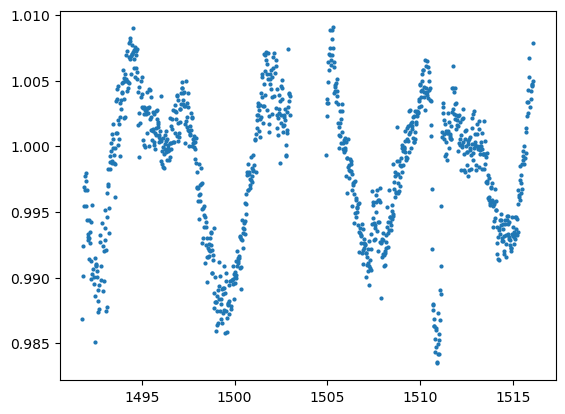

In [46]:
exop = np.load('../models/binaries1k/17816214_sector07.npy')
plt.scatter(exop[0],exop[1],s=4)

In [55]:
cnn.predict('/Users/azib/Documents/open_source/nets2/cnn-models/ensemble_s0002_i0200_b0.7.h5',
            exop[0],
            exop[1],
            exop[2])
            

 ... (more hidden) ...

33/33 [==============================] - 0s 4ms/step


 ... (more hidden) ...


Text(0, 0.5, 'Normalized Flux')

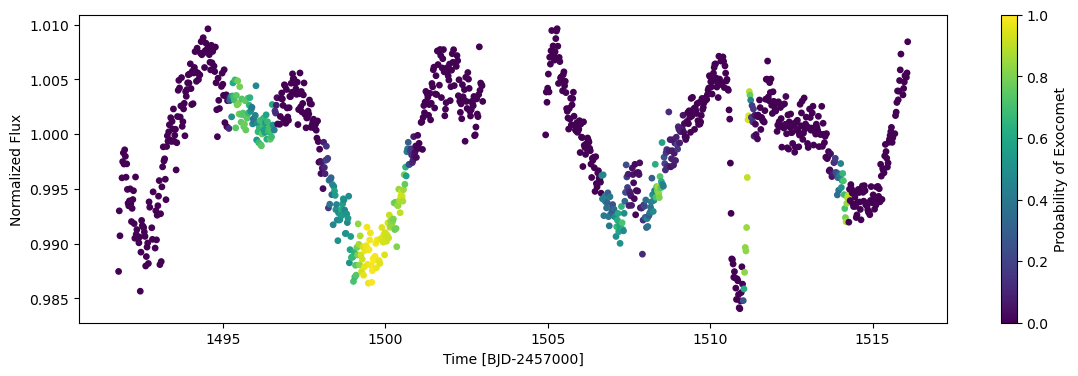

In [56]:
plt.figure(figsize=(14,4))
plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=cnn.predictions[0], vmin=0, vmax=1,s=15)
plt.colorbar(label='Probability of Exocomet')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Normalized Flux')
